# Imports

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the nn module implemented in the assignment
from nn.model import Sequential
from nn.layers import Dense, Input, Dropout
from nn.utils import one_hot

plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Serif"

In [3]:
DATA_DIR = os.path.join(os.getcwd(), 'data')
SAVE_DIR = os.path.join(os.getcwd(), 'plots')

# Note

>For this problem, I'm using the module which I implemented to solve the problem related to neural networks. You can find the module in the folder `nn`. The API of the module is similar to the one in `keras`. For more detail related to the module, please see the notebook `Working_With_nn_Module.ipynb` or the pdf with the same name.

# Loading Data

We start the exercise by first loading the dataset. 

In [5]:
#  training data stored in arrays X, y
data = pd.read_csv(os.path.join(DATA_DIR,'fashion-mnist_train.csv'))
X,y = data.iloc[:, 1:].values, data.iloc[:, 0].ravel()
m, nx = X.shape
print("Number of training examples: ", m)
print("Number of features: ", nx)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

Number of training examples:  10000
Number of features:  784
X shape:  (10000, 784)
y shape:  (10000,)


# Problem 1.1

## Visualizing the data

In [6]:
# Create dictionary of target classes
label_dict = {
0: r"T-shirt",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Boot"
}

/tmp/ipykernel_18188/3085498015.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(10, 10, i*10+j+1)


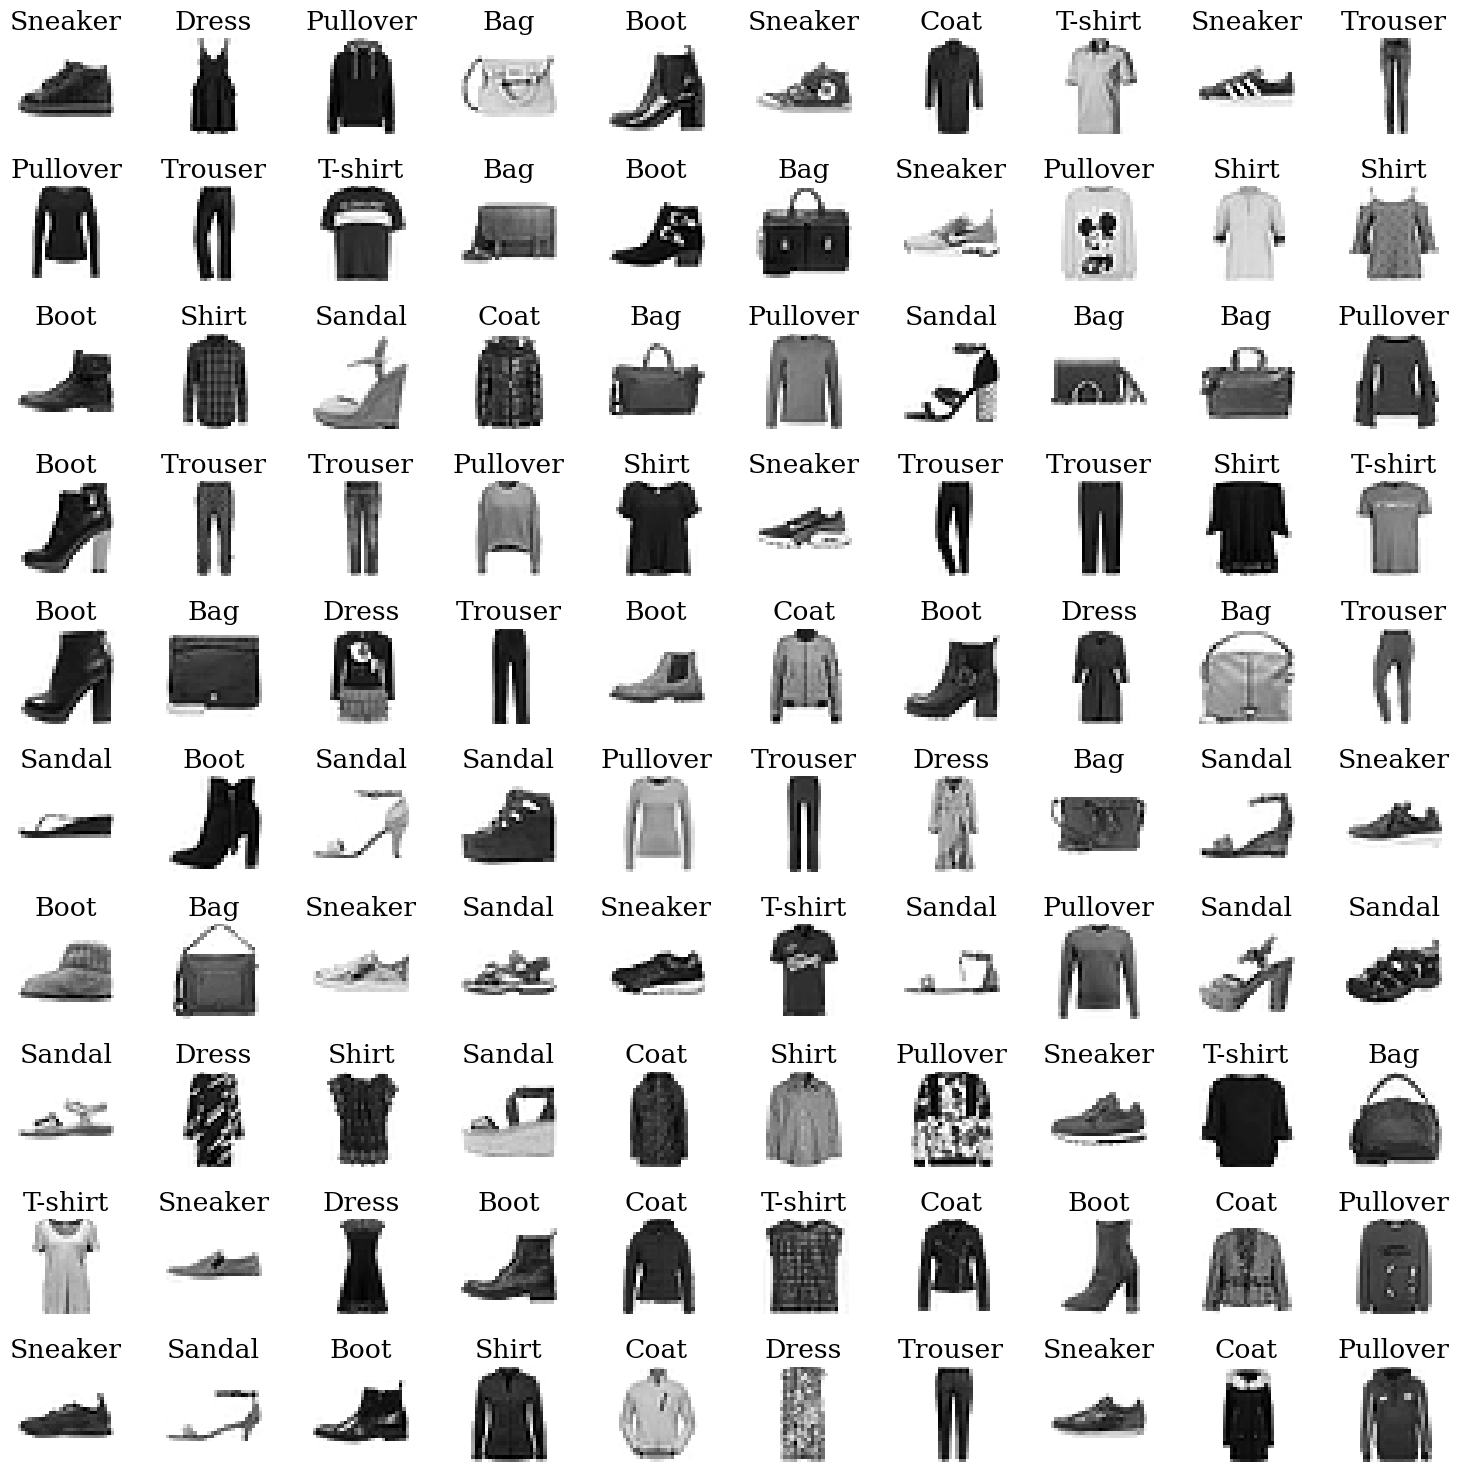

In [7]:
rand_indices = np.random.choice(X.shape[0], 100, replace=False)
sel = X[rand_indices, :]
y_sample = y[rand_indices]

ax, fig = plt.subplots(figsize=(15, 15))

for i in range(10):
    for j in range(10):
        ax = plt.subplot(10, 10, i*10+j+1)
        ax.imshow(sel[i*10+j, :].reshape(28, 28), cmap='binary')
        ax.axis('off')
        ax.set_title(label_dict[y_sample[i*10+j]])
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, '0101.png'))
plt.show()

## Normalizing

We'll normalize the data by dividing with 255.0. This will make the data range between 0 and 1.

In [8]:
X = X/255.0

In [9]:
print(X.shape)

(10000, 784)


## Train  Test

We'll be creating a train test split of 80% and 20% respectively. Also, as the module implmented by me assumes that the input has a shape of $(nx, m)$, we have to take the transpose of the input. Also, the shape of y has to be in form of $(n_y, m)$. For this we need to create the one hot encoding of the labels. The module provides an utility function for this.

In [10]:
np.random.seed(42)
ratio = 0.7
ids = np.arange(X.shape[0])
np.random.shuffle(ids)
train_ids = ids[:int(ratio * X.shape[0])]
test_ids = ids[int(ratio * X.shape[0]):]
X_train, y_train = X[train_ids], y[train_ids]
X_test, y_test = X[test_ids], y[test_ids]
assert len(X_train) + len(X_test) == len(X)
assert len(X_train)>len(X_test)

In [11]:
X_train = X_train.T
X_test = X_test.T

y_train_oh = one_hot(y_train, 10)
y_test_oh = one_hot(y_test, 10)

print(X_train.shape)
print(X_test.shape)
print(y_train_oh.shape)
print(y_test_oh.shape)

(784, 7000)
(784, 3000)
(10, 7000)
(10, 3000)


Great! Now we have the train and test data ready.

# Problem 1.2 and 1.3

Here is the problem statement:

1.2: Classify the dataset using neural networks, with two hidden layers. The number of nodes in the hidden layers
is your choice, as discussed in class. Calculate the optimized weights and biases and training set accuracy for
the model (take regularization parameter $\lambda$ = 0.1)

1.3: Implement sigmoid and ReLu activation functions and see which performs best. Add a SoftMax activation
for the output layer for both cases

Let's create the architecture. We'll use the following architecture:

$$
n_x = 784 \\
n^{[1]} = 100 \\
n^{[2]} = 50 \\
n_y = 10
$$

We also need to apply l2 regularization. So, we'll set the regularization parameter `l_2=0.1` for both the hidden layers. Output layer is not regularized.

## Sigmoid Model

In [12]:
model_sigmoid = Sequential(name = 'sigmoid model')
model_sigmoid.add(Input((784,), name='input'))
model_sigmoid.add(Dense(100, activation='sigmoid', name='layer 1', l2=0.01))
model_sigmoid.add(Dense(50, activation='sigmoid', name='layer 2', l2=0.01))
model_sigmoid.add(Dense(10, activation='softmax', name='output'))

model_sigmoid.summary()

Model: sigmoid model
_____________________________________________________________________________________
Name       # Neurons  Weight Shapes    Bias Shapes      # Parameters  Output Shapes
-------  -----------  ---------------  -------------  --------------  ---------------
input            784  ------           ------                      0  (784,)
layer 1          100  (100, 784)       (100, 1)                78500  (100,)
layer 2           50  (50, 100)        (50, 1)                  5050  (50,)
output            10  (10, 50)         (10, 1)                   510  (10,)
Total Parameters: 84060
_____________________________________________________________________________________


So, the model has over 84000 parameters! Next, we need to compile it.

In [13]:
model_sigmoid.compile(loss='categorical_cross_entropy', metrics=['accuracy', "precision"], initializer="glorot")

Now, we are ready to train the model. Let's train it for 100 epochs.

In [14]:
try:
    history_sigmoid = model_sigmoid.fit(X_train, y_train_oh, epochs=100, batch_size=32, lr=0.01, verbose=2)
except ValueError:
    print("dW is exploding becuase of Too large `l1` or `l2` value. Try decreasing it.")
    print(ValueError)

Epoch 0001/0100 | Loss: 2.25802 | Accuracy: 0.24043 | Precision: 0.42976 | 
Epoch 0010/0100 | Loss: 1.47816 | Accuracy: 0.58329 | Precision: 0.52192 | 
Epoch 0020/0100 | Loss: 1.04345 | Accuracy: 0.66857 | Precision: 0.77111 | 
Epoch 0030/0100 | Loss: 0.86326 | Accuracy: 0.71386 | Precision: 0.89957 | 
Epoch 0040/0100 | Loss: 0.76161 | Accuracy: 0.74114 | Precision: 0.94737 | 
Epoch 0050/0100 | Loss: 0.69282 | Accuracy: 0.75700 | Precision: 0.95915 | 
Epoch 0060/0100 | Loss: 0.64424 | Accuracy: 0.77157 | Precision: 0.96078 | 
Epoch 0070/0100 | Loss: 0.60777 | Accuracy: 0.78586 | Precision: 0.96235 | 
Epoch 0080/0100 | Loss: 0.57863 | Accuracy: 0.79643 | Precision: 0.96391 | 
Epoch 0090/0100 | Loss: 0.55438 | Accuracy: 0.80614 | Precision: 0.96541 | 
Epoch 0100/0100 | Loss: 0.53366 | Accuracy: 0.81314 | Precision: 0.96692 | 


>Using larger value of `l1` might result in exploding of the gradient. So, if you are getting an error that the gradient is exploding, try reducing the value of `l1`.

In [15]:
def plot_history(history, metric, title = None, file_name=None):
    plt.plot(history[metric], label=metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.grid()
    if title:
        plt.title(title)
    plt.legend()
    if file_name:
        plt.savefig(os.path.join(SAVE_DIR, file_name))
    plt.show()

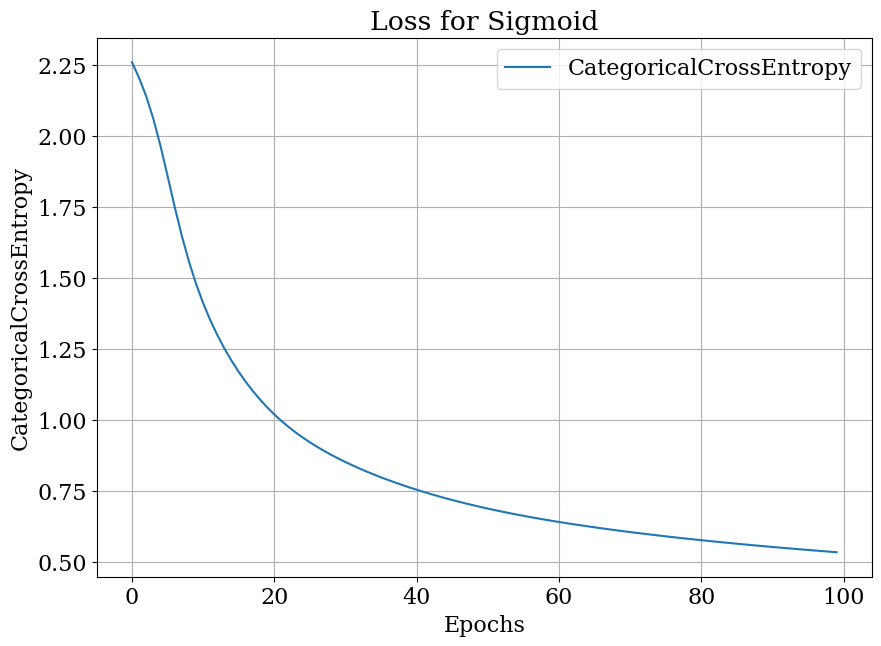

In [16]:
plot_history(history_sigmoid, 'CategoricalCrossEntropy', title='Loss for Sigmoid', file_name='0301.png')

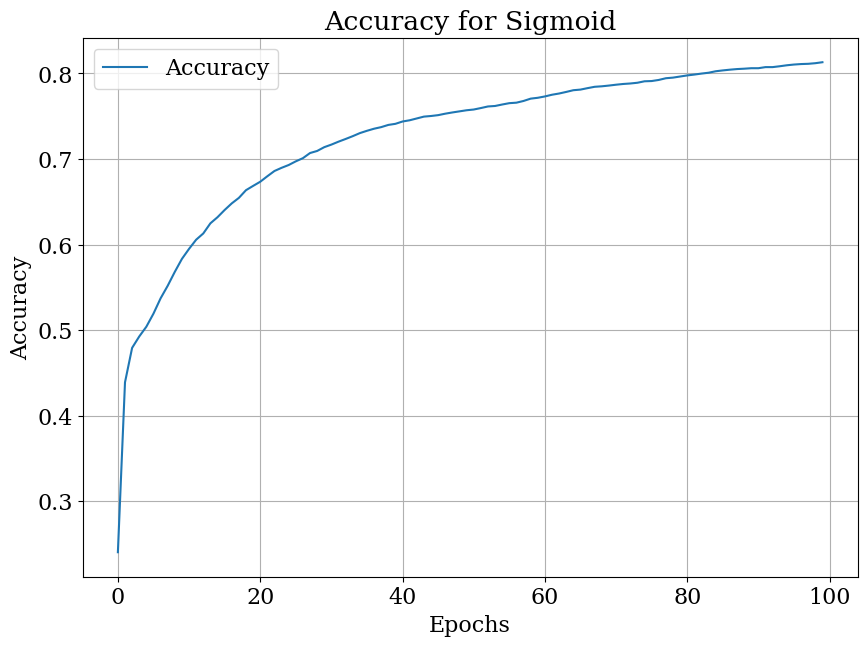

In [17]:
plot_history(history_sigmoid, 'Accuracy', title='Accuracy for Sigmoid', file_name='0302.png')

## ReLu Model

In [18]:
model_relu = Sequential(name = 'relu model')
model_relu.add(Input((784,), name='input'))
model_relu.add(Dense(100, activation='relu', name='layer 1', l2=0.01))
model_relu.add(Dense(50, activation='relu', name='layer 2', l2=0.01))
model_relu.add(Dense(10, activation='softmax', name='output'))

model_relu.summary()

Model: relu model
_____________________________________________________________________________________
Name       # Neurons  Weight Shapes    Bias Shapes      # Parameters  Output Shapes
-------  -----------  ---------------  -------------  --------------  ---------------
input            784  ------           ------                      0  (784,)
layer 1          100  (100, 784)       (100, 1)                78500  (100,)
layer 2           50  (50, 100)        (50, 1)                  5050  (50,)
output            10  (10, 50)         (10, 1)                   510  (10,)
Total Parameters: 84060
_____________________________________________________________________________________


So, the model has over 84000 parameters! Next, we need to compile it.

In [19]:
model_relu.compile(loss='categorical_cross_entropy', metrics=['accuracy', "precision"], initializer="glorot")

Now, we are ready to train the model. Let's train it for 100 epochs.

In [20]:
try:
    history_relu = model_relu.fit(X_train, y_train_oh, epochs=100, batch_size=32, lr=0.01, verbose=2)
except ValueError:
    print("dW is exploding becuase of Too large `l1` or `l2` value. Try decreasing it.")
    print(ValueError)

Epoch 0001/0100 | Loss: 1.03640 | Accuracy: 0.66571 | Precision: 0.91420 | 
Epoch 0010/0100 | Loss: 0.50287 | Accuracy: 0.83000 | Precision: 0.95147 | 
Epoch 0020/0100 | Loss: 0.40635 | Accuracy: 0.86400 | Precision: 0.96064 | 
Epoch 0030/0100 | Loss: 0.34763 | Accuracy: 0.88486 | Precision: 0.97076 | 
Epoch 0040/0100 | Loss: 0.30462 | Accuracy: 0.89743 | Precision: 0.97944 | 
Epoch 0050/0100 | Loss: 0.27144 | Accuracy: 0.90986 | Precision: 0.99114 | 
Epoch 0060/0100 | Loss: 0.24102 | Accuracy: 0.91929 | Precision: 0.99260 | 
Epoch 0070/0100 | Loss: 0.21507 | Accuracy: 0.92800 | Precision: 0.99115 | 
Epoch 0080/0100 | Loss: 0.19187 | Accuracy: 0.93529 | Precision: 0.99263 | 
Epoch 0090/0100 | Loss: 0.17256 | Accuracy: 0.94271 | Precision: 0.99558 | 
Epoch 0100/0100 | Loss: 0.15573 | Accuracy: 0.94757 | Precision: 0.99558 | 


We see that for the same number of epochs, the ReLu is performing much better as it is giving higher accuracy as well as higher precision.

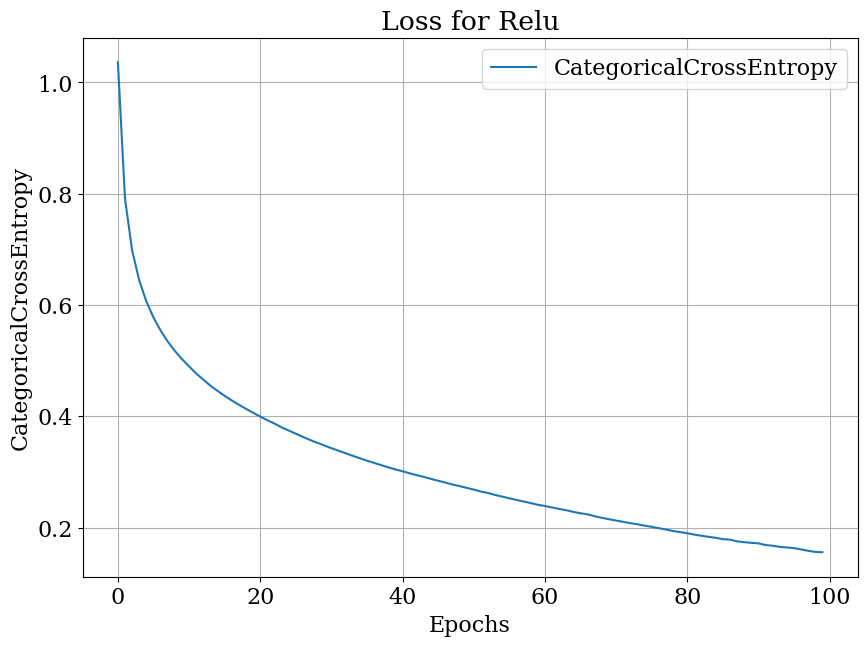

In [21]:
plot_history(history_relu, 'CategoricalCrossEntropy', title='Loss for Relu', file_name='0303.png')

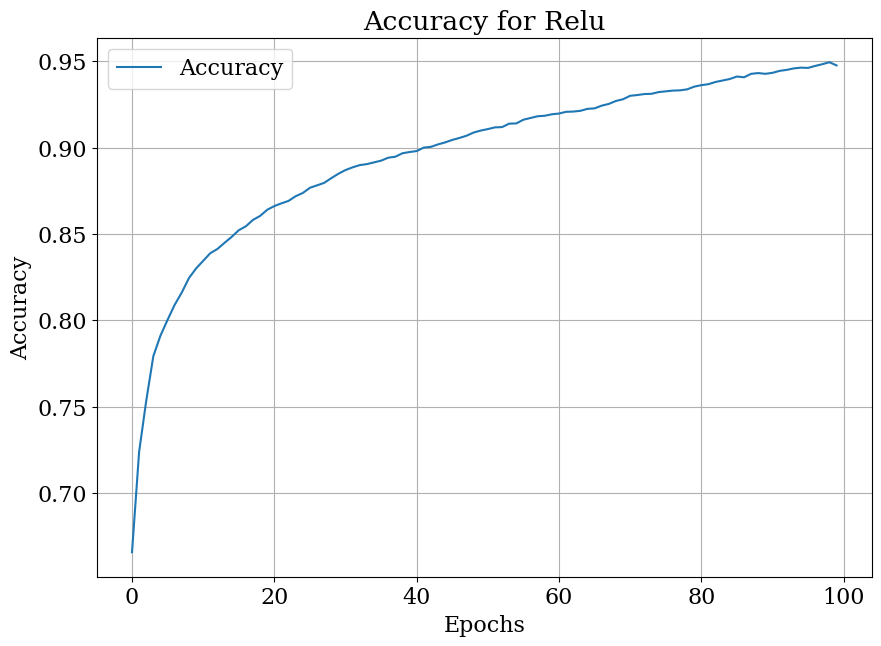

In [22]:
plot_history(history_relu, 'Accuracy', title='Accuracy for Relu', file_name='0304.png')

# Problem 1.4

Let's apply the models to the test data.

In [23]:
y_pred_sigmoid = model_sigmoid.predict(X_test)
y_pred_sigmoid = np.argmax(y_pred_sigmoid, axis=0)
sigmoid_acc = np.sum(y_pred_sigmoid == y_test)/len(y_test)
print(f"Accuracy for sigmoid model: {sigmoid_acc * 100:.2f}%")

Accuracy for sigmoid model: 81.03%


In [24]:
y_pred_relu = model_relu.predict(X_test)
y_pred_relu = np.argmax(y_pred_relu, axis=0)
relu_acc = np.sum(y_pred_relu == y_test)/len(y_test)
print(f"Accuracy for relu model: {relu_acc * 100:.2f}%")

Accuracy for relu model: 84.80%


# Problem 1.5

/tmp/ipykernel_18188/4030038833.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(row, col, i*col+j+1)


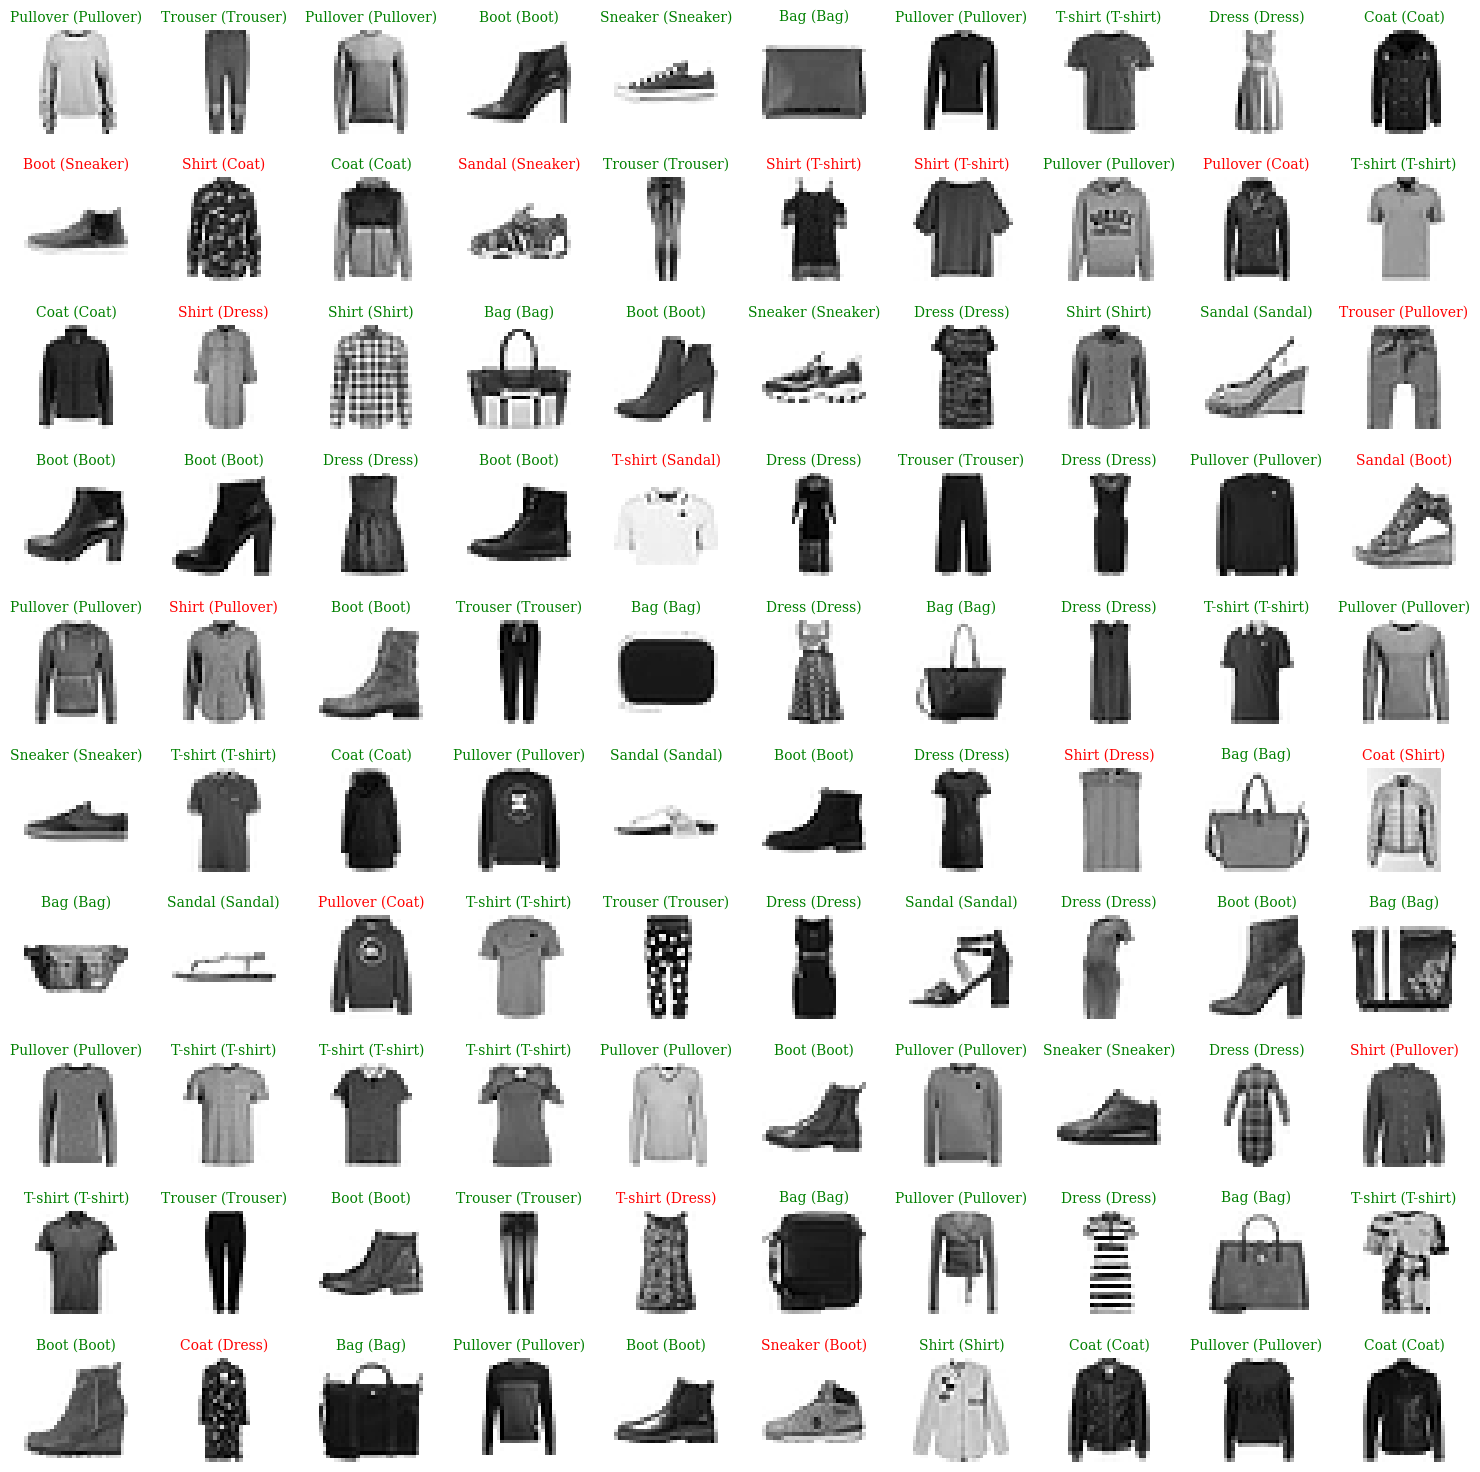

In [25]:
rand_indices = np.random.choice(X_test.shape[1], 100, replace=False)
sample = X_test[:, rand_indices]
y_sample = y_test[rand_indices]
y_pred = y_pred_sigmoid[rand_indices]
ax, fig = plt.subplots(figsize=(15, 15))

row, col = 10, 10
for i in range(row):
    for j in range(col):
        ax = plt.subplot(row, col, i*col+j+1)
        ax.imshow(sample[:, i*col+j].reshape(28, 28), cmap='binary')
        ax.axis('off')
        true_label = label_dict[y_sample[i*col+j]]
        pred_label = label_dict[y_pred[i*col+j]]
        if true_label == pred_label:
            ax.set_title(f"{true_label} ({pred_label})", color='green', fontdict={'fontsize': 10})
        else:
            ax.set_title(f"{true_label} ({pred_label})", color='red', fontdict={'fontsize': 10})
        
                     
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, '0501.png'))
plt.show()

/tmp/ipykernel_18188/3661618539.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(row, col, i*col+j+1)


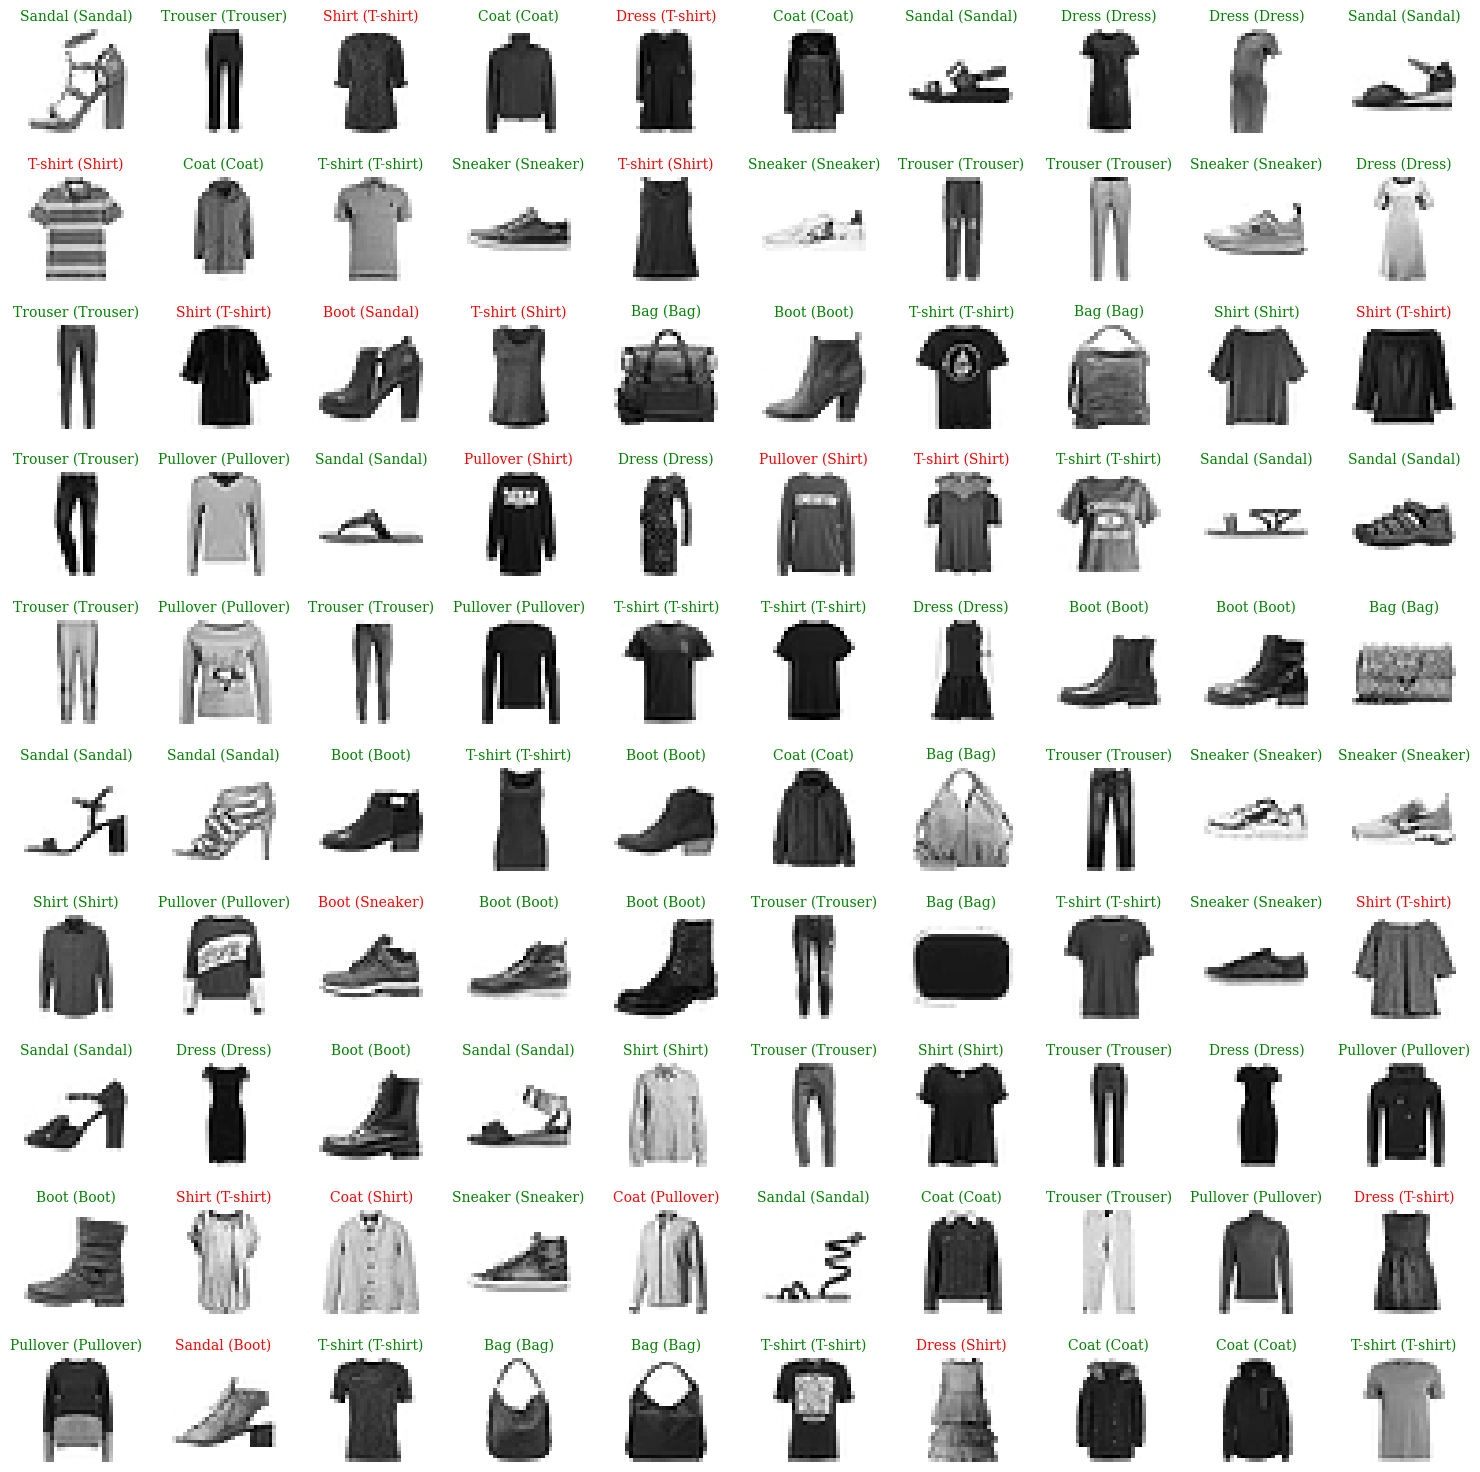

In [26]:
rand_indices = np.random.choice(X_test.shape[1], 100, replace=False)
sample = X_test[:, rand_indices]
y_sample = y_test[rand_indices]
y_pred = y_pred_relu[rand_indices]
ax, fig = plt.subplots(figsize=(15, 15))

row, col = 10, 10
for i in range(row):
    for j in range(col):
        ax = plt.subplot(row, col, i*col+j+1)
        ax.imshow(sample[:, i*col+j].reshape(28, 28), cmap='binary')
        ax.axis('off')
        true_label = label_dict[y_sample[i*col+j]]
        pred_label = label_dict[y_pred[i*col+j]]
        if true_label == pred_label:
            ax.set_title(f"{true_label} ({pred_label})", color='green', fontdict={'fontsize': 10})
        else:
            ax.set_title(f"{true_label} ({pred_label})", color='red', fontdict={'fontsize': 10})
        
                     
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, '0502.png'))
plt.show()

# Problem 1.6

In [27]:
y_pred_sigmoid = model_sigmoid.predict(X_test)
y_pred_sigmoid = np.argmax(y_pred_sigmoid, axis=0)
sigmoid_acc = np.sum(y_pred_sigmoid == y_test)/len(y_test)
print(f"Accuracy for sigmoid model: {sigmoid_acc * 100:.2f}%")

y_pred_relu = model_relu.predict(X_test)
y_pred_relu = np.argmax(y_pred_relu, axis=0)
relu_acc = np.sum(y_pred_relu == y_test)/len(y_test)
print(f"Accuracy for relu model: {relu_acc * 100:.2f}%")

Accuracy for sigmoid model: 81.03%
Accuracy for relu model: 84.80%


It is obvious that model with relu activation function is performing better than the model with sigmoid activation function.

# Problem 1.7

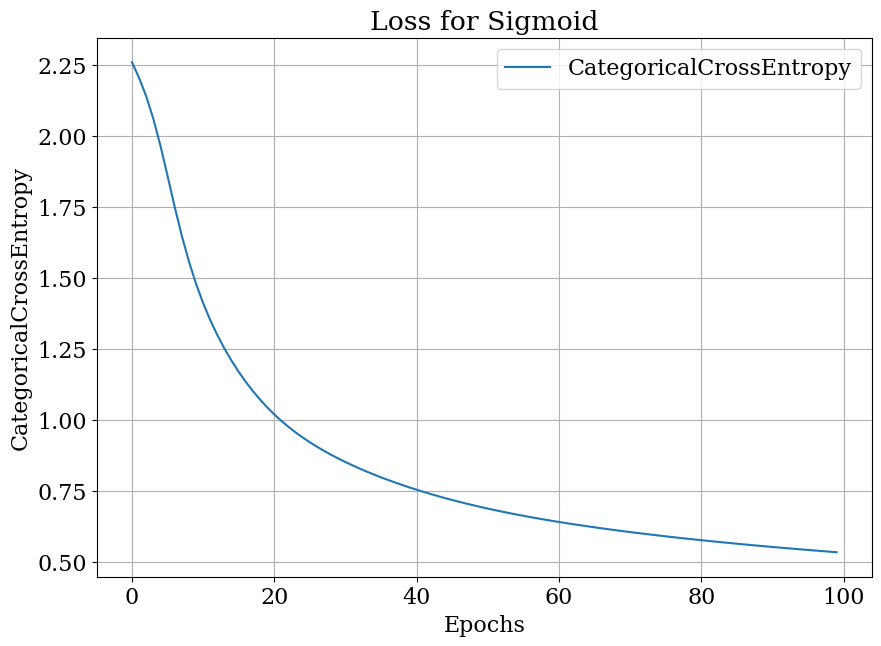

In [28]:
plot_history(history_sigmoid, 'CategoricalCrossEntropy', title='Loss for Sigmoid', file_name='0701.png')

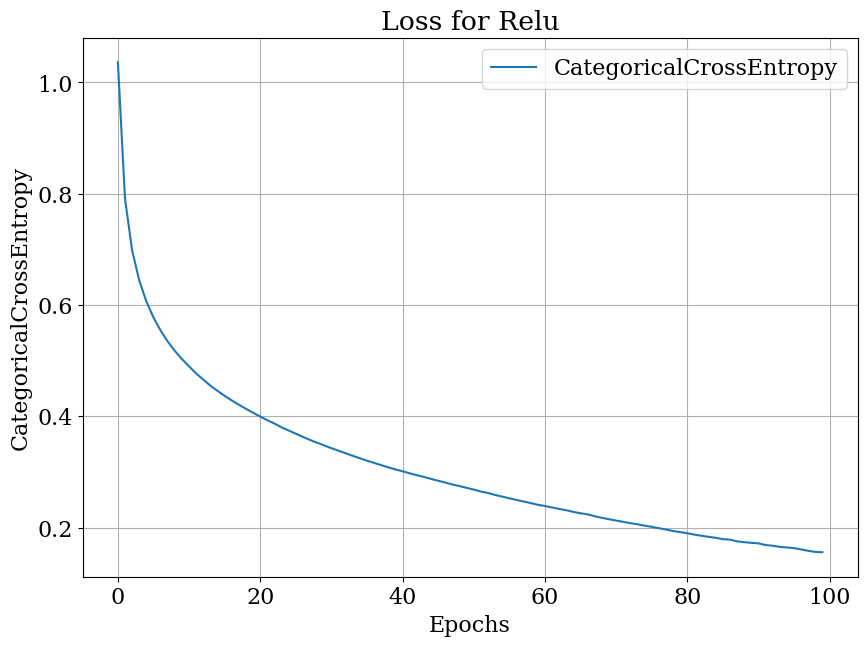

In [29]:
plot_history(history_relu, 'CategoricalCrossEntropy', title='Loss for Relu', file_name='0702.png')